# Building and Using Frequency lists

### COMM313 Spring 2019 (02/04/19)



## Readings


* Baker, P. (2006) Using Corpora in Discourse Analysis. London: Continuum - **Read Ch. 3**
* NLTK Book Ch. 2 (sections 1, 2 & 4 ) http://www.nltk.org/book/ch02.html 


    

## _The State of the Union_ is tomorrow night....

* From a few years back here is not so good example of a text analysis of the 2015 SOTU:

    http://www.ibtimes.com/sotu-speech-word-cloud-economy-jobs-among-most-used-words-president-obamas-address-1789174
    
  which basically amounts to taking the text of the speech and running it through Wordle!
  
### 2015 SOTU
  
  ![](sotu2015_word_cloud.jpg)

* It is not difficult to find other examples where presenting a Wordle/Word Cloud of a speech is posted by media outlets with little or no interpretation


* For example, here https://www.sfgate.com/politics/article/Full-text-President-Trump-s-2018-State-of-the-12538245.php is the SOTU address by President Trump last year.


### 2018 SOTU

![](sotu2018_word_cloud.jpg)

* There is a lot going on with visual differences, such as font style, size, color, and text layout that make comparison less than optimal.


* There is also no clear information about what choices have been made about handling the text, such as:
    * handling case (__NORMALIZATION__)
        * `tonight`, `many`, `Let's` (2015) vs `Tonight`, `Many`, `let` (2018)
    * what is a word (__TOKENIZATION__)

### However....

* The notion that __WHICH__ words and __HOW OFTEN__ those words are used in a speech or group of speeches can be used to reveal temporal, individual and ideological insights is sound.


* This notion is at the heart of all computational text analysis and the foundation of methods such as _corpus linguistics_.

### Today

* We'll build on the Python basics we started to use:

    * string objects and functions
    * lists
    * loops
    * conditions
    * and functions
    

* We'll introduce a new object _the dictionary_
    
    
* And we'll look at _State of the Union_ speeches
    

## Setup

* import modules needed - best to keep these all at the top of your notebook
* set parameter values, e.g., diretory paths, frequently used values like a list of punctuation, etc., that will be used throughout the notebook

In [318]:
# import modules

%matplotlib inline

import os
import random
import re

import matplotlib.pyplot as plt
import seaborn as sn

from collections import Counter

import pandas as pd

from IPython.display import IFrame

In [319]:
### PARAMETERS

to_strip = ',.\xa0:-()\';$"/?][!`Ą@Ś§¨’–“”…ï‘>&\\%˝˘*'

## Functions

* Also good to put functions you are going use throughout the notebook at the top
* These are some of the functions we have seen in previous notebooks and assignments

In [320]:
def tokenize(text, lowercase=True, strip_chars=to_strip):
    '''turn a string into a list of whitespace separated tokens - after observing lowercase flag and stripping specified characters
    
    Args:
        text        -- a string object containing the text to be tokenized
        strip_chars -- a string containing a series of characters which should be stripped from text before tokenization (default: empty string)
        
    
    Returns:
        list of tokens
    '''
    if lowercase:
        text=text.lower()    
    rdict = str.maketrans('','',strip_chars)
    text = text.translate(rdict)
        
    tokens=text.split()
    
    return tokens

In [321]:
def get_bigram_tokens(tokens):
    '''crate a list of bigrams from a list of tokens
    
    Args:
        tokens   --  a list of tokens 
        
    Returns:
        list of bigrams
    '''   
    new_tokens = []
    
    for i in range(len(tokens)-1):
        new_tokens.append(" ".join(tokens[i:i+2]))
        
    return new_tokens

In [322]:
def compare_items(dist1, dist2, items, scaling=10000):
    ''' given two Counter objects with common keys compare the frequency and relative frequency of list of items
    
    Args:
        dist1    -- Counter frequency list object
        dist2    -- Counter frequency list object
        items    -- list of string items that should be keys in dist1 and dist2
        scaling  -- normalization factor, e.g. 10,000 words (default: 100000)
    
    Returns:
    
        list of tuples of form
            (item, item_freq_dist1, norm_item_freq_dist1, item_freq_dist2, norm_item_freq_dist2)
    '''
    dist1_size = sum(dist2.values())
    dist2_size = sum(dist2.values())

    item_comparison = []
    
    for item in items:
        
        d1_freq = dist1.get(item,0)
        d2_freq = dist2.get(item,0)
        
        item_comparison.append((item, 
                                d1_freq, d1_freq/dist1_size*scaling,
                                d2_freq, d2_freq/dist2_size*scaling))
    
    return item_comparison
        

In [323]:
def comparison_plot(comparison_data, label1='corpus 1', label2='corpus 2'):
    ''' create a paired barplot of relative frequencies of items in two corpora
    
    Args:
        comparison_data --  list of tuples produced by the compare_items() function
        label1          --  legend label for first corpus (default: corpus 1)
        label2          --  legend label for second corpus (default: corpus 2)
        
    Produces a Seaborn barplot
    '''
    fig = plt.figure(figsize=(12,6))
    
    df=pd.DataFrame(comparison_data)[[0,2,4]] 
    df.columns = ['item', label1, label2]
    df2=df.melt(id_vars=['item'])
    df2.columns=['item', 'corpus', 'frequency']
    sn.barplot(x='item',y='frequency', hue='corpus',data=df2)
    plt.show()

## 1. Looking at two speeches

* First we read the contents of the file containing the 2015 SOTU speech into a string object

In [324]:
text2015 = open('/data/SOTU/2015-Obama.txt').read()

In [325]:
text2015

"\nTHE PRESIDENT:  Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:\n \nWe are 15 years into this new century.  Fifteen years that dawned with terror touching our shores; that unfolded with a new generation fighting two long and costly wars; that saw a vicious recession spread across our nation and the world.  It has been, and still is, a hard time for many. \n \nBut tonight, we turn the page.  Tonight, after a breakthrough year for America, our economy is growing and creating jobs at the fastest pace since 1999.  (Applause.)  Our unemployment rate is now lower than it was before the financial crisis.  More of our kids are graduating than ever before.  More of our people are insured than ever before.  (Applause.)  And we are as free from the grip of foreign oil as we’ve been in almost 30 years.  (Applause.)\n \nTonight, for the first time since 9/11, our combat mission in Afghanistan is over.  (Applause.)  Six years ago, nearly 180,000 American troops served i

In [326]:
len(text2015)

40287

In [327]:
tmpl='This is a string template. You provide values to fill in with the format() function. Val1: {} Val2: {}'

In [261]:
tmpl

'This is a string template. You provide values to fill in with the format() function. Val1: {} Val2: {}'

In [330]:
tmpl.format(1343,'Goodbye!!!!')

'This is a string template. You provide values to fill in with the format() function. Val1: 1343 Val2: Goodbye!!!!'

In [331]:
print('{} characters in text2015, here are the first 500:\n\n'.format(len(text2015)))
print(text2015[:500])

40287 characters in text2015, here are the first 500:



THE PRESIDENT:  Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans:
 
We are 15 years into this new century.  Fifteen years that dawned with terror touching our shores; that unfolded with a new generation fighting two long and costly wars; that saw a vicious recession spread across our nation and the world.  It has been, and still is, a hard time for many. 
 
But tonight, we turn the page.  Tonight, after a breakthrough year for America, our economy is growing and creatin


In [340]:
text2015.count('(Applause.)')

82

* And now do the same with 2018 SOTU speech

In [332]:
text2018 = open('/data/SOTU/2018-Trump.txt').read()

In [333]:
print('{} characters in text2018, here are the first 500:\n\n'.format(len(text2018)))
print(text2018[:500])

35570 characters in text2018, here are the first 500:


Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and my fellow Americans:
Less than one year has passed since I first stood at this podium, in this majestic chamber, to speak on behalf of the American people and to address their concerns, their hopes, and their dreams. That night, our new administration had already taken very swift action. A new tide of optimism was already sweeping across our land.

Each day since, we have gone forward with a clear visi


In [334]:
tokens2015 = tokenize(text2015)

In [341]:
tokens2015[0:200]

['the',
 'president',
 'mr',
 'speaker',
 'mr',
 'vice',
 'president',
 'members',
 'of',
 'congress',
 'my',
 'fellow',
 'americans',
 'we',
 'are',
 '15',
 'years',
 'into',
 'this',
 'new',
 'century',
 'fifteen',
 'years',
 'that',
 'dawned',
 'with',
 'terror',
 'touching',
 'our',
 'shores',
 'that',
 'unfolded',
 'with',
 'a',
 'new',
 'generation',
 'fighting',
 'two',
 'long',
 'and',
 'costly',
 'wars',
 'that',
 'saw',
 'a',
 'vicious',
 'recession',
 'spread',
 'across',
 'our',
 'nation',
 'and',
 'the',
 'world',
 'it',
 'has',
 'been',
 'and',
 'still',
 'is',
 'a',
 'hard',
 'time',
 'for',
 'many',
 'but',
 'tonight',
 'we',
 'turn',
 'the',
 'page',
 'tonight',
 'after',
 'a',
 'breakthrough',
 'year',
 'for',
 'america',
 'our',
 'economy',
 'is',
 'growing',
 'and',
 'creating',
 'jobs',
 'at',
 'the',
 'fastest',
 'pace',
 'since',
 '1999',
 'applause',
 'our',
 'unemployment',
 'rate',
 'is',
 'now',
 'lower',
 'than',
 'it',
 'was',
 'before',
 'the',
 'financial

In [342]:
tokens2018 = tokenize(text2018)

In [343]:
print('{} tokens in the 2015 SOTU speech'.format(len(tokens2015)))
print('{} tokens in the 2018 SOTU speech'.format(len(tokens2018)))

6811 tokens in the 2015 SOTU speech
5957 tokens in the 2018 SOTU speech


* And remember we started to use __CONDITIONS__ as a way to create different behaviors in our code based on a specific value.


* For example, we could test to see which speech contains more tokens.

In [346]:
print('Who used more words in their SOTU speech?')

if len(tokens2015) > len(tokens2018):
    print('Obama did!')
else:
    print('Trump did!')

Who used more words in their SOTU speech?
Obama did!


### Creating a frequency list with the `Counter` object

* The `Counter()` object in Python is really useful for tabulating the number of times items occur in a list.


In [347]:
Counter([1,2,3,1,2,3,'a','B','c','C','a'])

Counter({1: 2, 2: 2, 3: 2, 'B': 1, 'C': 1, 'a': 2, 'c': 1})

In [348]:
flist=Counter([1,2,3,1,2,3,'a','B','c','C','a'])
flist.most_common()

[(1, 2), (2, 2), (3, 2), ('a', 2), ('B', 1), ('c', 1), ('C', 1)]

* So given our list of tokens created by the `tokenize()` function on the string object referenced by `text2015`

In [349]:
wdist2015 = Counter(tokens2015)

In [351]:
wdist2015.most_common()

[('the', 262),
 ('and', 250),
 ('to', 241),
 ('a', 155),
 ('we', 154),
 ('of', 153),
 ('that', 125),
 ('our', 113),
 ('in', 108),
 ('applause', 86),
 ('this', 62),
 ('for', 62),
 ('i', 62),
 ('are', 51),
 ('is', 51),
 ('it', 50),
 ('have', 47),
 ('as', 45),
 ('new', 41),
 ('with', 41),
 ('more', 41),
 ('on', 37),
 ('america', 35),
 ('will', 35),
 ('its', 32),
 ('at', 31),
 ('but', 30),
 ('thats', 30),
 ('us', 29),
 ('you', 28),
 ('than', 27),
 ('from', 27),
 ('so', 27),
 ('years', 25),
 ('were', 25),
 ('every', 24),
 ('who', 24),
 ('do', 24),
 ('their', 24),
 ('can', 24),
 ('make', 23),
 ('people', 22),
 ('up', 22),
 ('or', 22),
 ('need', 22),
 ('want', 21),
 ('one', 21),
 ('not', 21),
 ('they', 21),
 ('time', 20),
 ('work', 20),
 ('like', 20),
 ('has', 19),
 ('american', 19),
 ('all', 19),
 ('country', 19),
 ('what', 19),
 ('americans', 18),
 ('world', 18),
 ('economy', 18),
 ('jobs', 18),
 ('where', 18),
 ('my', 17),
 ('if', 17),
 ('when', 17),
 ('lets', 17),
 ('know', 16),
 ('famili

* You can also query the `Counter` object by passing a string inside square brackets

In [275]:
wdist2015['new']

41

In [352]:
wdist2015['great']

7

* We can do the same thing with our list of tokens from `text2018`

In [353]:
wdist2018 = Counter(tokens2018)
wdist2018.most_common(20)

[('and', 247),
 ('the', 237),
 ('to', 197),
 ('of', 138),
 ('we', 131),
 ('applause', 117),
 ('in', 105),
 ('our', 104),
 ('a', 98),
 ('that', 68),
 ('is', 57),
 ('are', 55),
 ('have', 48),
 ('you', 47),
 ('for', 46),
 ('this', 42),
 ('will', 38),
 ('i', 36),
 ('it', 36),
 ('on', 33)]

* Let's say we wanted to look up the frequency of each the following words in the 2015 SOTU speech:
    * _new_
    * _old_
    * _people_
    * _nation_
    * _great_
    
    
* We could create a block of code something like this:

In [354]:
print('new', wdist2015['new'])
print('old', wdist2015['old'])
print('people', wdist2015['people'])
print('nation', wdist2015['nation'])
print('great', wdist2015['great'])

new 41
old 2
people 22
nation 7
great 7


* __BUT__ if you find yourself copying and pasting or retyping the same thing a number of times then that should make you stop and think...

    __THERE MUST BE A BETTER WAY TO DO THIS!!!__
    
    
* Especially as code copy-paste can be very error prone and you can end up with something like:

In [355]:
print('new', wdist2015['new'])
print('old', wdist2015['new'])
print('people', wdist2015['new'])

new 41
old 41
people 41


* Also if you wanted to change the list of words or add another 3 or 4 it gets very tedious.


#### Using a `for` loop

* We started to look at how a `for` loop works.


* Given a list of items a `for` loop will move a pointer along the list from the beginning to the end and execute a __block__ of code

In [280]:
for item in [1,2,3,4]:
    print('item currently points to the value {}'.format(item))

item currently points to the value 1
item currently points to the value 2
item currently points to the value 3
item currently points to the value 4


* So for our frequency lookup we can define a list of words we want to look up

In [356]:
words_to_lookup = ['new','old','people','nation','great']

* And then loop over the list and get the value of that item in the `Counter` object


* e.g. for 2015 SOTU:

In [361]:
for word in words_to_lookup:
    print(word, wdist2015[word])

new 41
old 2
people 22
nation 7
great 7


* e.g. for 2018 SOTU:

In [362]:
for word in words_to_lookup:
    print(word, wdist2018[word])

new 21
old 3
people 33
nation 9
great 26


* This gives us the basis for a frequency comparison table:

In [376]:
words_to_compare = ['great','america','american','new', 'families', 'believe', 'make', 'today', 'tonight', 'jobs']

In [370]:
for item in words_to_compare:
    print("{: <30}{: <6}\t{}".format(item, wdist2015[item], wdist2018[item]))

great                         7     	26
america                       35    	22
american                      19    	31
new                           41    	21
families                      16    	5
believe                       7     	3
make                          23    	5


* And with a header row to make it more pretty!

In [371]:
print("{: <20}{: <6}\t{}".format('item', '2015', '2018'))
print("="*40)

for item in words_to_compare:
    print("{: <20}{: <6}\t{}".format(item, wdist2015[item], wdist2018[item]))

item                2015  	2018
great               7     	26
america             35    	22
american            19    	31
new                 41    	21
families            16    	5
believe             7     	3
make                23    	5


In [373]:
7/6811*10000

10.277492291880781

In [374]:
def normalize_freq(freq, size, base=10000):
    '''normalize the frequency of an item based on the size of the text/corpus using a base, e.g. per 10,000 words
    
    Args:
        freq   --  the frequency of the item
        size   --  the size (number of tokens) in the text/corpus
        base   --  normalization unit (DEFAULT: 10,000 tokens)
    
    Returns:
        normalized frequency
    
    '''
    norm_freq = freq/size * base
    return norm_freq

In [377]:
print("{: <20}{: <6}\t{}".format('item', '2015', '2018'))
print("="*40)

for item in words_to_compare:
    
    f2015 = normalize_freq(wdist2015[item], len(tokens2015))
    f2018 = normalize_freq(wdist2018[item], len(tokens2018))
    
    
    print("{: <20}{:0.2f}\t{:0.2f}".format(item, f2015, f2018))

item                2015  	2018
great               10.28	43.65
america             51.39	36.93
american            27.90	52.04
new                 60.20	35.25
families            23.49	8.39
believe             10.28	5.04
make                33.77	8.39
today               14.68	5.04
tonight             19.09	38.61
jobs                26.43	10.07


## 2. Using _dictionaries_ in Python

* Using matched length `lists` for data items

In [378]:
presidents = ['Carter', 'Reagan', 'Bush', 'Clinton', 'GWBush', 'Obama']
num_of_terms = [1, 2, 1, 2, 2, 2]
party = ['dem', 'rep', 'rep', 'dem', 'rep', 'dem']

In [381]:
presidents

['Carter', 'Reagan', 'Bush', 'Clinton', 'GWBush', 'Obama']

In [382]:
presidents[0]

'Carter'

In [383]:
presidents[1]

'Reagan'

In [384]:
presidents[2]

'Bush'

In [290]:
for pres, terms, affil in zip(presidents, num_of_terms, party):
    print(pres, terms, affil)

Carter 1 dem
Reagan 2 rep
Bush 1 rep
Clinton 2 dem
GWBush 2 rep
Obama 2 dem


In [379]:
presidents[2], num_of_terms[2], party[2]

('Bush', 1, 'rep')

In [380]:
print("{} was a {} and was in office for {} terms".format(presidents[4], party[4], num_of_terms[4]))

GWBush was a rep and was in office for 2 terms


* A `dictionary` is an unordered set of **KEY**-**VALUE** pairs
* You can define one with curly braces `{` `}`
* With a pair in the format: `key : value`
* And pairs are separated by commas

In [385]:
presidents_terms = { 'Carter'  : 1,
                     'Reagan'  : 2,
                     'Bush'    : 1,
                     'Clinton' : 2,
                     'GWBush'  : 2,
                     'Obama'   : 2
                   }

In [386]:
presidents_terms

{'Bush': 1, 'Carter': 1, 'Clinton': 2, 'GWBush': 2, 'Obama': 2, 'Reagan': 2}

* We can access a value using the key in a similar way to an index in a list

In [388]:
presidents_terms['Carter']

1

In [390]:
presidents_terms['obama']

KeyError: 'obama'

In [391]:
presidents_terms.keys()

dict_keys(['Carter', 'Reagan', 'Bush', 'Clinton', 'GWBush', 'Obama'])

In [392]:
presidents_terms.values()

dict_values([1, 2, 1, 2, 2, 2])

In [393]:
for pres in presidents_terms:
    print(pres, 'was president for', presidents_terms[pres], 'terms')

Carter was president for 1 terms
Reagan was president for 2 terms
Bush was president for 1 terms
Clinton was president for 2 terms
GWBush was president for 2 terms
Obama was president for 2 terms


In [298]:
for pres, terms in presidents_terms.items():
    print(pres,terms)

Carter 1
Reagan 2
Bush 1
Clinton 2
GWBush 2
Obama 2


In [299]:
for pres, terms in presidents_terms.items():
    
    if terms == 1:
        term_string = 'term'
    else:
        term_string = 'terms'
        
    print('President', pres, 'was in office for', terms, term_string)

President Carter was in office for 1 term
President Reagan was in office for 2 terms
President Bush was in office for 1 term
President Clinton was in office for 2 terms
President GWBush was in office for 2 terms
President Obama was in office for 2 terms


In [300]:
for pres, terms in presidents_terms.items():
    
    term_string = 'term' if terms==1 else 'terms'
        
    print('President', pres, 'was in office for', terms, term_string)

President Carter was in office for 1 term
President Reagan was in office for 2 terms
President Bush was in office for 1 term
President Clinton was in office for 2 terms
President GWBush was in office for 2 terms
President Obama was in office for 2 terms


## 3. The SOTU corpus

In [394]:
sotu_texts = os.listdir('/data/SOTU')

In [395]:
len(sotu_texts)

75

In [303]:
sotu_texts

['2007-GWBush.txt',
 '1987-Reagan.txt',
 '1947-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '2003-GWBush.txt',
 '1986-Reagan.txt',
 '1956-Eisenhower.txt',
 '1948-Truman.txt',
 '1961-Kennedy.txt',
 '1999-Clinton.txt',
 '1981-Reagan.txt',
 '1971-Nixon.txt',
 '1965-Johnson-2.txt',
 '1951-Truman.txt',
 '2012-Obama.txt',
 '1955-Eisenhower.txt',
 '1958-Eisenhower.txt',
 '1946-Truman.txt',
 '2002-GWBush.txt',
 '1972-Nixon.txt',
 '2001-GWBush-2.txt',
 '1996-Clinton.txt',
 '1998-Clinton.txt',
 '2015-Obama.txt',
 '1980-Carter.txt',
 '1989-Bush.txt',
 '1976-Ford.txt',
 '2016-Obama.txt',
 '1968-Johnson.txt',
 '1977-Ford.txt',
 '1950-Truman.txt',
 '1991-Bush-2.txt',
 '2006-GWBush.txt',
 '1993-Clinton.txt',
 '1975-Ford.txt',
 '1973-Nixon.txt',
 '1963-Kennedy.txt',
 '1962-Kennedy.txt',
 '2001-GWBush-1.txt',
 '1963-Johnson.txt',
 '1995-Clinton.txt',
 '1982-Reagan.txt',
 '1978-Carter.txt',
 '1966-Johnson.txt',
 '1974-Nixon.txt',
 '2018-Trump.txt',
 '2011-Obama.txt',
 '1992-Bush.txt',
 

In [396]:
sorted(sotu_texts)

['1945-Truman.txt',
 '1946-Truman.txt',
 '1947-Truman.txt',
 '1948-Truman.txt',
 '1949-Truman.txt',
 '1950-Truman.txt',
 '1951-Truman.txt',
 '1953-Eisenhower.txt',
 '1954-Eisenhower.txt',
 '1955-Eisenhower.txt',
 '1956-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1958-Eisenhower.txt',
 '1959-Eisenhower.txt',
 '1960-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1962-Kennedy.txt',
 '1963-Johnson.txt',
 '1963-Kennedy.txt',
 '1964-Johnson.txt',
 '1965-Johnson-1.txt',
 '1965-Johnson-2.txt',
 '1966-Johnson.txt',
 '1967-Johnson.txt',
 '1968-Johnson.txt',
 '1969-Johnson.txt',
 '1970-Nixon.txt',
 '1971-Nixon.txt',
 '1972-Nixon.txt',
 '1973-Nixon.txt',
 '1974-Nixon.txt',
 '1975-Ford.txt',
 '1976-Ford.txt',
 '1977-Ford.txt',
 '1978-Carter.txt',
 '1979-Carter.txt',
 '1980-Carter.txt',
 '1981-Reagan.txt',
 '1982-Reagan.txt',
 '1983-Reagan.txt',
 '1984-Reagan.txt',
 '1985-Reagan.txt',
 '1986-Reagan.txt',
 '1987-Reagan.txt',
 '1988-Reagan.txt',
 '1989-Bush.txt',
 '1990-Bush.txt',
 '1991-Bush-1.txt',
 '1991-B

In [399]:
sotu_texts[0].replace('.txt','').split('-')

['2007', 'GWBush']

In [400]:
for item in sotu_texts:
    print(item.replace('.txt','').split('-'))

['2007', 'GWBush']
['1987', 'Reagan']
['1947', 'Truman']
['1953', 'Eisenhower']
['1957', 'Eisenhower']
['2003', 'GWBush']
['1986', 'Reagan']
['1956', 'Eisenhower']
['1948', 'Truman']
['1961', 'Kennedy']
['1999', 'Clinton']
['1981', 'Reagan']
['1971', 'Nixon']
['1965', 'Johnson', '2']
['1951', 'Truman']
['2012', 'Obama']
['1955', 'Eisenhower']
['1958', 'Eisenhower']
['1946', 'Truman']
['2002', 'GWBush']
['1972', 'Nixon']
['2001', 'GWBush', '2']
['1996', 'Clinton']
['1998', 'Clinton']
['2015', 'Obama']
['1980', 'Carter']
['1989', 'Bush']
['1976', 'Ford']
['2016', 'Obama']
['1968', 'Johnson']
['1977', 'Ford']
['1950', 'Truman']
['1991', 'Bush', '2']
['2006', 'GWBush']
['1993', 'Clinton']
['1975', 'Ford']
['1973', 'Nixon']
['1963', 'Kennedy']
['1962', 'Kennedy']
['2001', 'GWBush', '1']
['1963', 'Johnson']
['1995', 'Clinton']
['1982', 'Reagan']
['1978', 'Carter']
['1966', 'Johnson']
['1974', 'Nixon']
['2018', 'Trump']
['2011', 'Obama']
['1992', 'Bush']
['1997', 'Clinton']
['1985', 'Reagan']

In [401]:
my_dict = {}

In [403]:
my_dict['obama'] = '2015'

In [405]:
my_dict['obama']

'2015'

In [406]:
my_dict['bush']

KeyError: 'bush'

In [407]:
my_dict['bush']=2001

In [408]:
my_dict['bush']

2001

In [404]:
my_dict

{'obama': '2015'}

In [413]:
DEBUG = True

years_sotu = {}

for speech in sotu_texts:
    
    year=speech.split('-')[0]
    president=speech.split('-')[1].replace('.txt','')
    
    if DEBUG:
        print(president, year)
    
    if years_sotu.get(president):
        years_sotu[president].append(year)
    else:
        years_sotu[president] = [ year ]
        
        

GWBush 2007
Reagan 1987
Truman 1947
Eisenhower 1953
Eisenhower 1957
GWBush 2003
Reagan 1986
Eisenhower 1956
Truman 1948
Kennedy 1961
Clinton 1999
Reagan 1981
Nixon 1971
Johnson 1965
Truman 1951
Obama 2012
Eisenhower 1955
Eisenhower 1958
Truman 1946
GWBush 2002
Nixon 1972
GWBush 2001
Clinton 1996
Clinton 1998
Obama 2015
Carter 1980
Bush 1989
Ford 1976
Obama 2016
Johnson 1968
Ford 1977
Truman 1950
Bush 1991
GWBush 2006
Clinton 1993
Ford 1975
Nixon 1973
Kennedy 1963
Kennedy 1962
GWBush 2001
Johnson 1963
Clinton 1995
Reagan 1982
Carter 1978
Johnson 1966
Nixon 1974
Trump 2018
Obama 2011
Bush 1992
Clinton 1997
Reagan 1985
Johnson 1965
Eisenhower 1954
Obama 2013
Truman 1945
Obama 2010
Bush 1991
GWBush 2004
Reagan 1988
Reagan 1983
Reagan 1984
Truman 1949
Bush 1990
Eisenhower 1959
GWBush 2005
Carter 1979
Johnson 1964
Eisenhower 1960
Johnson 1967
GWBush 2008
Obama 2014
Clinton 2000
Johnson 1969
Clinton 1994
Nixon 1970


In [411]:
years_sotu['Obama']

['2012', '2015', '2016', '2011', '2013', '2010', '2014']

### Frequency lists

In [414]:
word_dist = Counter()

for speech in sotu_texts:
    
    if DEBUG:
        print('Processing', speech)
    
    speech_text = open(os.path.join('/data/SOTU/',speech)).read()
    
    speech_tokens = tokenize(speech_text, strip_chars=to_strip)
    
    word_dist.update(speech_tokens)
    

Processing 2007-GWBush.txt
Processing 1987-Reagan.txt
Processing 1947-Truman.txt
Processing 1953-Eisenhower.txt
Processing 1957-Eisenhower.txt
Processing 2003-GWBush.txt
Processing 1986-Reagan.txt
Processing 1956-Eisenhower.txt
Processing 1948-Truman.txt
Processing 1961-Kennedy.txt
Processing 1999-Clinton.txt
Processing 1981-Reagan.txt
Processing 1971-Nixon.txt
Processing 1965-Johnson-2.txt
Processing 1951-Truman.txt
Processing 2012-Obama.txt
Processing 1955-Eisenhower.txt
Processing 1958-Eisenhower.txt
Processing 1946-Truman.txt
Processing 2002-GWBush.txt
Processing 1972-Nixon.txt
Processing 2001-GWBush-2.txt
Processing 1996-Clinton.txt
Processing 1998-Clinton.txt
Processing 2015-Obama.txt
Processing 1980-Carter.txt
Processing 1989-Bush.txt
Processing 1976-Ford.txt
Processing 2016-Obama.txt
Processing 1968-Johnson.txt
Processing 1977-Ford.txt
Processing 1950-Truman.txt
Processing 1991-Bush-2.txt
Processing 2006-GWBush.txt
Processing 1993-Clinton.txt
Processing 1975-Ford.txt
Processing

In [415]:
word_dist.most_common()

[('the', 23813),
 ('and', 15077),
 ('of', 14614),
 ('to', 14308),
 ('in', 8739),
 ('a', 7322),
 ('we', 7178),
 ('our', 6779),
 ('that', 5453),
 ('for', 4949),
 ('is', 4209),
 ('i', 3634),
 ('this', 3469),
 ('will', 3413),
 ('have', 2899),
 ('be', 2715),
 ('are', 2692),
 ('it', 2633),
 ('on', 2420),
 ('with', 2328),
 ('as', 2157),
 ('by', 2064),
 ('all', 1897),
 ('not', 1853),
 ('more', 1751),
 ('but', 1738),
 ('must', 1654),
 ('their', 1646),
 ('can', 1582),
 ('people', 1524),
 ('has', 1436),
 ('you', 1407),
 ('new', 1370),
 ('from', 1342),
 ('they', 1331),
 ('us', 1301),
 ('world', 1252),
 ('at', 1250),
 ('applause', 1238),
 ('congress', 1207),
 ('year', 1159),
 ('or', 1130),
 ('america', 1129),
 ('an', 1113),
 ('now', 1090),
 ('these', 1088),
 ('who', 1070),
 ('its', 1044),
 ('years', 1035),
 ('which', 1028),
 ('do', 997),
 ('government', 987),
 ('american', 980),
 ('so', 968),
 ('than', 954),
 ('should', 858),
 ('one', 816),
 ('if', 801),
 ('every', 801),
 ('make', 796),
 ('been', 7

In [416]:
word_dist_cond = {}

for speech in sotu_texts:
    
    if DEBUG:
        print('Processing', speech)
        
    president = speech.split('-')[1].replace('.txt','')
    
    speech_text = open(os.path.join('/data/SOTU/',speech)).read()
    
    speech_tokens = tokenize(speech_text, strip_chars=to_strip)
    
    if word_dist_cond.get(president):
        word_dist_cond[president].update(speech_tokens)
    else:
        word_dist_cond[president] = Counter(speech_tokens)

Processing 2007-GWBush.txt
Processing 1987-Reagan.txt
Processing 1947-Truman.txt
Processing 1953-Eisenhower.txt
Processing 1957-Eisenhower.txt
Processing 2003-GWBush.txt
Processing 1986-Reagan.txt
Processing 1956-Eisenhower.txt
Processing 1948-Truman.txt
Processing 1961-Kennedy.txt
Processing 1999-Clinton.txt
Processing 1981-Reagan.txt
Processing 1971-Nixon.txt
Processing 1965-Johnson-2.txt
Processing 1951-Truman.txt
Processing 2012-Obama.txt
Processing 1955-Eisenhower.txt
Processing 1958-Eisenhower.txt
Processing 1946-Truman.txt
Processing 2002-GWBush.txt
Processing 1972-Nixon.txt
Processing 2001-GWBush-2.txt
Processing 1996-Clinton.txt
Processing 1998-Clinton.txt
Processing 2015-Obama.txt
Processing 1980-Carter.txt
Processing 1989-Bush.txt
Processing 1976-Ford.txt
Processing 2016-Obama.txt
Processing 1968-Johnson.txt
Processing 1977-Ford.txt
Processing 1950-Truman.txt
Processing 1991-Bush-2.txt
Processing 2006-GWBush.txt
Processing 1993-Clinton.txt
Processing 1975-Ford.txt
Processing

In [417]:
word_dist_cond['Obama'].most_common(20)

[('the', 2116),
 ('to', 1627),
 ('and', 1622),
 ('of', 1159),
 ('a', 973),
 ('that', 885),
 ('we', 883),
 ('our', 795),
 ('in', 753),
 ('applause', 545),
 ('for', 461),
 ('is', 408),
 ('i', 372),
 ('this', 367),
 ('it', 337),
 ('will', 333),
 ('on', 326),
 ('have', 297),
 ('with', 297),
 ('more', 290)]

In [421]:
word_dist_cond['GWBush']['america']

225

In [422]:
word_dist_cond['GWBush']['america'], word_dist_cond['Obama']['america']

(225, 181)

In [423]:
compare_items(word_dist_cond['GWBush'], word_dist_cond['Obama'], items=['america', 'people', 'poor'])

[('america', 225, 46.86816505926219, 181, 37.7028350032287),
 ('people', 174, 36.24471431249609, 175, 36.45301726831504),
 ('poor', 6, 1.2498177349136586, 3, 0.6249088674568293)]

In [424]:
comparison_GWBush_Obama = compare_items(word_dist_cond['GWBush'], word_dist_cond['Obama'], 
                                        items=['america', 'people', 'poor', 'war', 'jobs', 'families'])

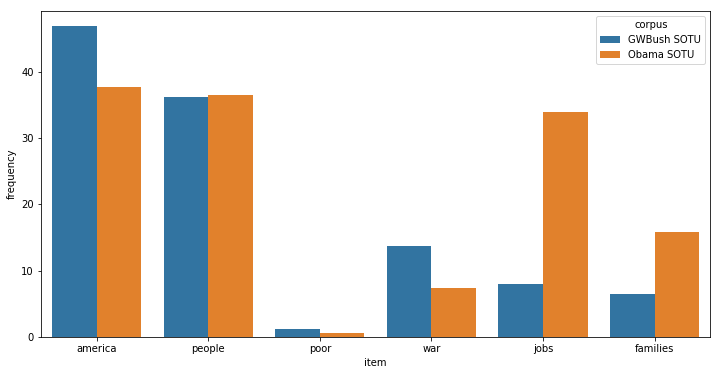

In [425]:
comparison_plot(comparison_GWBush_Obama, 'GWBush SOTU', 'Obama SOTU')

In [316]:
comparison_Reagan_Clinton = compare_items(word_dist_cond['Reagan'], word_dist_cond['Clinton'], 
                                        items=['america', 'people', 'poor', 'war', 'jobs', 'families'])

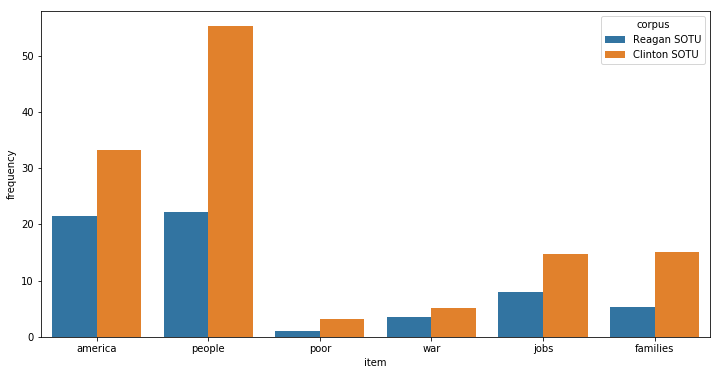

In [426]:
comparison_plot(comparison_Reagan_Clinton, 'Reagan SOTU', 'Clinton SOTU')

In [427]:
word_dist_cond.keys()

dict_keys(['GWBush', 'Reagan', 'Truman', 'Eisenhower', 'Kennedy', 'Clinton', 'Nixon', 'Johnson', 'Obama', 'Carter', 'Bush', 'Ford', 'Trump'])

In [429]:
comp_table=compare_items(word_dist_cond['Truman'], word_dist_cond['Nixon'], 
                                        items=['war','jobs','great','money','congress','senate'])

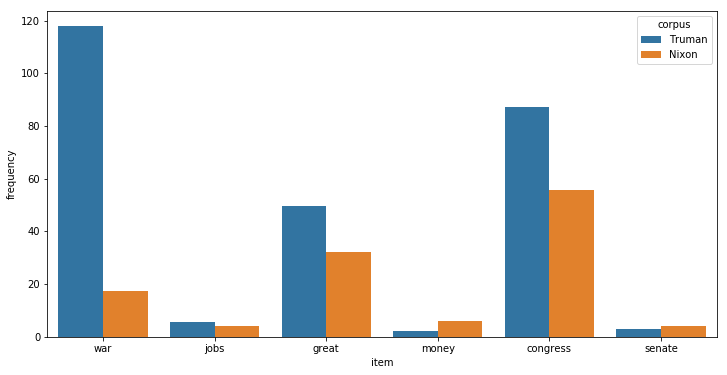

In [430]:
comparison_plot(comp_table,'Truman','Nixon')